# XGBoost를 이용한 유방암 데이터 분류


## 유방암 데이터 분류

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
dataset

# 유방암 데이터의 독립변수
X_features = dataset.data
X_features

# 유방암 데이터의 종속변수
y_label = dataset.target
y_label

# 컬럼의 이름들
feature_names = dataset.feature_names
feature_names

# 데이터프레임으로 만들기
# X_features -> 리스트 형태를 데이터프레임으로 변환하기 -> pandas 필요 
cancer_df = pd.DataFrame(data = X_features)
cancer_df

# 칸 이름 입히기
cancer_df.columns = feature_names
cancer_df

# 열추가 종속변수
cancer_df["target"] = y_label
cancer_df

# null값 저장되어있는지 여부 ( 없어서 넘어감 )

# cacncer_df의 target 컬럼의 빈도수 출력
cancer_df["target"].value_counts()

# 독립변수만 리턴
# iloc 사용하여 [ : 줄인덱스 -> 모든 줄, : -1 칸인덱스 ->  첫번째 칸 ~ 마지막 칸(target)제외] 
# cancer_df.loc[ : ,"mean radius" : "worst"]
cancer_df.iloc[ : , : -1]

# 종속변수 
# 예측하고 싶은 값
# 0 : 악성 / 1 : 양성
cancer_df["target"]

# 데이터 나누어줌
# 독립 75% / 25% 
# 종속 75% / 25%
# 1. 실행할 때 마다 매번 다른 줄이 선택이 됨
# 4. 훈련
X_train, X_test, y_train, y_test = train_test_split(
        cancer_df.iloc[ : , :-1 ]  # 독립변수
      , cancer_df["target"]        # 종속변수
      , test_size = 0.2 # 3. 비율이 달라지면 값이 달라짐 (독립 : 80%,20% / 종속 8/2)
      , random_state= 156  # 2. 매번 같은 줄이 선택 되도록 (세자리수 정수 : 같은 세자리 정수 사용하면 같은 줄이 선택)
)
X_train


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
172,15.460,11.89,102.50,736.9,0.12570,0.15550,0.203200,0.10970,0.1966,0.07069,0.4209,0.6583,2.805,44.64,0.005393,0.023210,0.043030,0.013200,0.01792,0.004168,18.79,17.04,125.00,1102.0,0.1531,0.3583,0.58300,0.18270,0.3216,0.10100
160,11.750,20.18,76.10,419.8,0.10890,0.11410,0.068430,0.03738,0.1993,0.06453,0.5018,1.6930,3.926,38.34,0.009433,0.024050,0.041670,0.011520,0.03397,0.005061,13.32,26.21,88.91,543.9,0.1358,0.1892,0.19560,0.07909,0.3168,0.07987
173,11.080,14.71,70.21,372.7,0.10060,0.05743,0.023630,0.02583,0.1566,0.06669,0.2073,1.8050,1.377,19.08,0.014960,0.021210,0.014530,0.015830,0.03082,0.004785,11.35,16.82,72.01,396.5,0.1216,0.0824,0.03938,0.04306,0.1902,0.07313
504,9.268,12.87,61.49,248.7,0.16340,0.22390,0.097300,0.05252,0.2378,0.09502,0.4076,1.0930,3.014,20.04,0.009783,0.045420,0.034830,0.021880,0.02542,0.010450,10.28,16.38,69.05,300.2,0.1902,0.3441,0.20990,0.10250,0.3038,0.12520
476,14.200,20.53,92.41,618.4,0.08931,0.11080,0.050630,0.03058,0.1506,0.06009,0.3478,1.0180,2.749,31.01,0.004107,0.032880,0.028210,0.013500,0.01610,0.002744,16.45,27.26,112.10,828.5,0.1153,0.3429,0.25120,0.13390,0.2534,0.07858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,11.520,18.75,73.34,409.0,0.09524,0.05473,0.030360,0.02278,0.1920,0.05907,0.3249,0.9591,2.183,23.47,0.008328,0.008722,0.013490,0.008670,0.03218,0.002386,12.84,22.47,81.81,506.2,0.1249,0.0872,0.09076,0.06316,0.3306,0.07036
10,16.020,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.03323,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.011010,0.007591,0.01460,0.003042,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.14590,0.09975,0.2948,0.08452
485,12.450,16.41,82.85,476.7,0.09514,0.15110,0.154400,0.04846,0.2082,0.07325,0.3921,1.2070,5.004,30.19,0.007234,0.074710,0.111400,0.027210,0.03232,0.009627,13.78,21.03,97.82,580.6,0.1175,0.4061,0.48960,0.13420,0.3231,0.10340
418,12.700,12.17,80.88,495.0,0.08785,0.05794,0.023600,0.02402,0.1583,0.06275,0.2253,0.6457,1.527,17.37,0.006131,0.012630,0.009075,0.008231,0.01713,0.004414,13.65,16.92,88.12,566.9,0.1314,0.1607,0.09385,0.08224,0.2775,0.09464


# GXBoost 

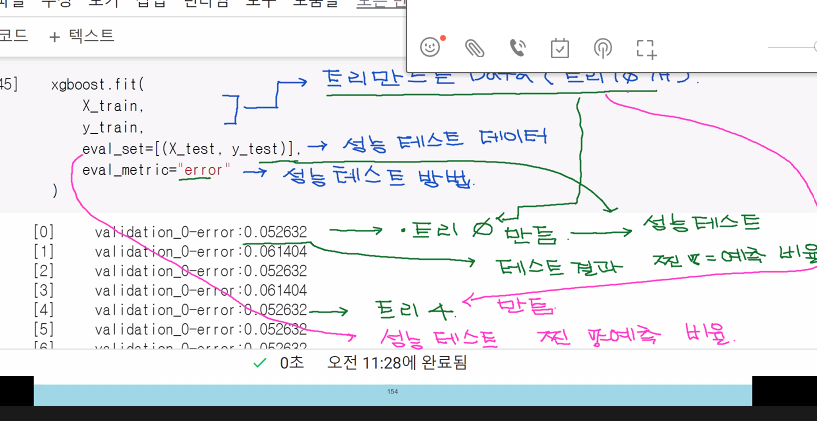

In [ ]:
# 오차를 점점 작아지게 하는
from xgboost import XGBClassifier

# 오차 (찐-예측)이 점점 작아지는 트리 10개를 만들 객체
xgboost = XGBClassifier(n_estimators=10)

xgboost.fit(
    X_train, # 트리 만드는 data(트리10개)
    y_train,  # 트리 만드는 data(트리10개)
    eval_set=[(X_test, y_test)], # 성능 테스트 할 데이터 = 찐 예측 비율
    eval_metric="error" # 성능 테스트 방법
)

[0]	validation_0-error:0.052632
[1]	validation_0-error:0.061404
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.052632


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## 예측

In [ ]:
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV


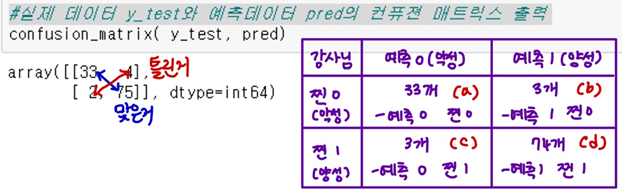

In [ ]:
pred = xgboost.predict(X_test)
print('예측 : ', pred)
print("="* 30)


# 실제로 무엇이 틀렸는지 비교
print( '실제로 무엇이 틀렸는지 : ', confusion_matrix(y_test, pred))

# 정확도 계산
print('정확도 : ', accuracy_score(y_test, pred))
print("="* 30)

# 정밀도 계산
# (기본) 1의 precision : 1 이라고 예측한 거 중 찐 1의 비율
print('정밀도 1 : ', precision_score(y_test, pred))


# 정밀도 계산은 0,1 두개임 옵션 해줌
# 0 이라고 예측한것 중 진짜 0은?
# pos_label= 0 : 0의 정밀도 계산
print('정밀도 0 :', precision_score(y_test, pred, pos_label= 0 ))
print("="* 30)

# 1의 recall (재현율) : 진짜 1중에서 1로 올바르게 예측한 비율 (기본이 1)
# pos_label= 0 옵션 주면 0이 재현율
print('재현율 0 : ', recall_score(y_test, pred, pos_label= 0))
print("="* 30)

# 1의 f1_score (기본)
# pos_label= 0 옵션 주면 0이 Fmaesure
print('Fmeasure 0 : ', f1_score(y_test, pred, pos_label= 0 ))
print("="* 30)

# roc / auc
# 면적 계산
# 기본 0의 roc_auc_score 계산 [0, 1]
# 1의 roc_auc_score 계산 [1, 0]
print('roc_auc_score 1 : ', roc_auc_score(y_test, pred, labels=[1, 0]))
print('roc_auc_score 0 : ', roc_auc_score(y_test, pred, labels=[0, 1]))
print("="* 30)


예측 :  [1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1
 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0
 1 1 1]
실제로 무엇이 틀렸는지 :  [[34  3]
 [ 3 74]]
정확도 :  0.9473684210526315
정밀도 1 :  0.961038961038961
정밀도 0 : 0.918918918918919
재현율 0 :  0.918918918918919
Fmeasure 0 :  0.918918918918919
roc_auc_score 1 :  0.93997893997894
roc_auc_score 0 :  0.93997893997894


# 정확도 올리기

In [ ]:
# XGBoost의 파라메터 리스트
params = {
    'max_depth' : [5, 6, 7],
    'min_child_weight' : [1, 3, 5, 7],
    'colsample_bytree' : [0.1, 0.3 ,0.5 ,0.75 ,1.0],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
}

# XGBClassifier() :  XGB 객체 생성
# 1n_estimators = 100 : 100개의 DecisionTree를 갖는 XGBoost객체 생성

xgb_clf = XGBClassifier(n_estimators = 100)
xgb_clf

# 성능을 올리기 위해
# 최적의 파라메터를 찾아주는 GridSearchCV 객체 생성
# 위경우의 수에 맞는 모든 트리를 만들어서 최적의 'max_depth', 'min_child_weight', 'colsample_bytree', 'learning_rate'값을 찾음
# xgb_clf : 최적의 파라메터를 찾을 XGBoost 객체 ( 오차의 절댓값이 가장 적은것 찾음)
# params : XGBoost의 파라메터 리스트 ( 이 중에서 최적의 파라메터를 찾음 )
gridcv = GridSearchCV(xgb_clf, param_grid = params)

# gridcv.fit : gridcv에 설정된 모든 경우의수에 대해서 최소의 cost를 갖는 XGBoost의 최적의 파라메터를 찾음
gridcv.fit(X_train,
           y_train,
           eval_set = [(X_test, y_test)],
           eval_metric='error'
           )


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[0]	validation_0-error:0.070175
[1]	validation_0-error:0.070175
[2]	validation_0-error:0.070175
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.070175
[6]	validation_0-error:0.070175
[7]	validation_0-error:0.070175
[8]	validation_0-error:0.070175
[9]	validation_0-error:0.070175
[10]	validation_0-error:0.070175
[11]	validation_0-error:0.070175
[12]	validation_0-error:0.070175
[13]	validation_0-error:0.070175
[14]	validation_0-error:0.070175
[15]	validation_0-error:0.061404
[16]	validation_0-error:0.070175
[17]	validation_0-error:0.061404
[18]	validation_0-error:0.061404
[19]	validation_0-error:0.061404
[20]	validation_0-error:0.070175
[21]	validation_0-error:0.061404
[22]	validation_0-error:0.070175
[23]	validation_0-error:0.070175
[24]	validation_0-error:0.070175
[25]	validation_0-error:0.061404
[26]	validation_0-error:0.070175
[27]	validation_0-error:0.070175
[28]	validation_0-error:0.070175
[29]	validation_0

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.1, 0.3, 0.5, 0.75, 1.0],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                     

## 정확도가 올라간 예측

In [ ]:
# 선택된 파라미터들은 아래와 같이 출력

print('GridSearchCV 최적 파라미터 :' , gridcv.best_params_)
# 오차를 낮추는 분류기 
# gridcv.best_estimator_ 를 사용하여 위 최적의 파라미터를 가진 분류기 하나 만듬
# gridcv 에 설정된 모든 경우의 수에 대해서 최소의 값을 같는 XGBoost객체 리턴
print('최적의 파라미터 가진 분류기 생성 : ', gridcv.best_estimator_)
print("="* 30)

# gridcv의 최적의 파라미터를 갖는 XGBoost를 이용하여 X_test 데이터의 유방암 데이터 예측 
# 0 : 악성 / 1 : 양성
pred = gridcv.predict(X_test)
print('예측 : ', pred) 

# 혼합 매트릭스 (y_test, pred)
print('혼합 매트릭스 : ', confusion_matrix(y_test, pred))
print("="* 30)

# 정확도
print('정확도 :',accuracy_score(y_test, pred))
print("="* 30)

# 정밀도
print('정밀도 : ', precision_score(y_test, pred))
print("="* 30)

# 재현율
print('재현율 : ',recall_score(y_test, pred))
print("="* 30)

# Fmaesure
print('Fmaesure : ', f1_score(y_test, pred))
print("="* 30)

# roc auc
print('roc_auc : ',roc_auc_score(y_test, pred))
print("="* 30)



# feature_imporances_ : 각 컬럼의 중요도 리턴
ftr_importances_values = gridcv.best_estimator_.feature_importances_
ftr_importances_values
print("="* 30)



GridSearchCV 최적 파라미터 : {'colsample_bytree': 0.3, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 3}
최적의 파라미터 가진 분류기 생성 :  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
예측 :  [1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1
 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1
 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0
 1 1 1]
혼합 매트릭스 :  [[35  2]
 [ 2 75]]
정확도 : 0.9649122807017544
정밀도 :  0.974025974025974
재현율 :  0.974025974025974
Fmaesure :  0.974025974025974
roc_auc :  0.959985959

In [ ]:
# ftr_importances_values 를 Serise로 변환
# index 각줄의 이름
# 각 줄의 이름은 학습데이터 컬럼
ftr_importances = pd.Series(ftr_importances_values, index = feature_names)
ftr_importances

# 정렬
ftr_importances = ftr_importances.sort_values(ascending=False)
ftr_importances

mean concavity             0.232858
mean perimeter             0.134140
mean area                  0.121757
worst fractal dimension    0.108623
worst perimeter            0.081839
worst radius               0.060048
worst concave points       0.030105
worst concavity            0.029775
worst compactness          0.029612
worst texture              0.024886
radius error               0.021863
concavity error            0.016829
mean concave points        0.016125
mean radius                0.015936
worst smoothness           0.011751
compactness error          0.010318
mean texture               0.007979
worst area                 0.007673
worst symmetry             0.007435
mean compactness           0.007066
area error                 0.006471
mean fractal dimension     0.004773
mean smoothness            0.003408
fractal dimension error    0.002687
symmetry error             0.002645
concave points error       0.001532
smoothness error           0.001057
mean symmetry              0

### 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

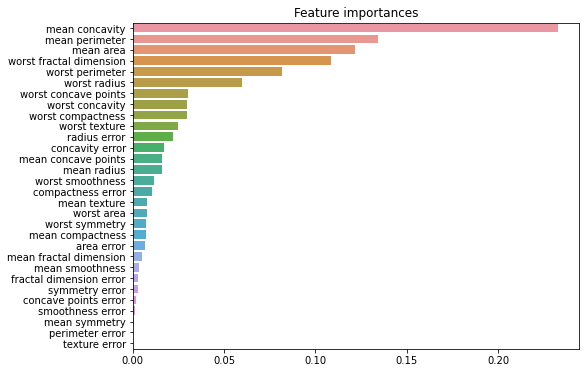

In [ ]:
plt.figure(figsize = (8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_importances, y = ftr_importances.index)
plt.show()